# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [2]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('/users/teddyandalex/documents/data_science/data-science-class/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [3]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('/users/teddyandalex/documents/data_science/data-science-class/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [8]:
# show the first review
print data[0]

{u'votes': {u'funny': 0, u'useful': 5, u'cool': 2}, u'user_id': u'rLtl8ZkDX5vH5nAx9C3q5Q', u'review_id': u'fWKvX83p0-ka4JS3dc6E5A', u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever

In [4]:
# convert the list of dictionaries to a DataFrame
dataf = pd.DataFrame.from_dict(data, orient = 'columns')
dataf.head()


,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [22]:
# add DataFrame columns for cool, useful, and funny
votes2 = data['votes']
votes2.head()

0    {u'funny': 0, u'useful': 5, u'cool': 2}
1    {u'funny': 0, u'useful': 0, u'cool': 0}
2    {u'funny': 0, u'useful': 1, u'cool': 0}
3    {u'funny': 0, u'useful': 2, u'cool': 1}
4    {u'funny': 0, u'useful': 0, u'cool': 0}
Name: votes, dtype: object

In [ ]:
# drop the votes column and then display the head


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [5]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
yelp.head()
print yelp.groupby('stars').funny.mean()
print yelp.groupby('stars').useful.mean()
print yelp.groupby('stars').cool.mean()
    

stars
1    1.056075
2    0.875944
3    0.694730
4    0.670448
5    0.608631
Name: funny, dtype: float64
stars
1    1.604806
2    1.563107
3    1.306639
4    1.395916
5    1.381780
Name: useful, dtype: float64
stars
1    0.576769
2    0.719525
3    0.788501
4    0.954623
5    0.944261
Name: cool, dtype: float64


/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


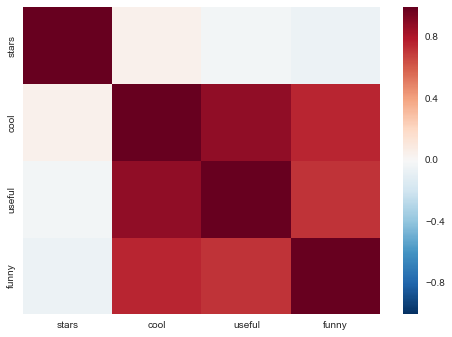

In [6]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

yelp.corr()

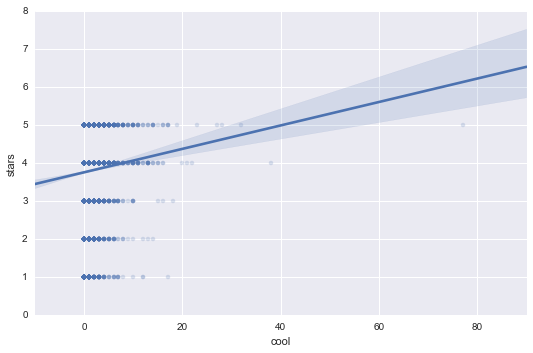

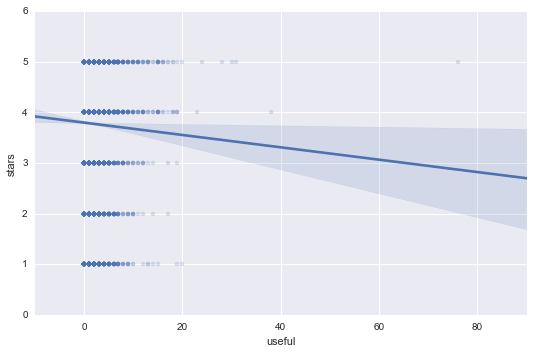

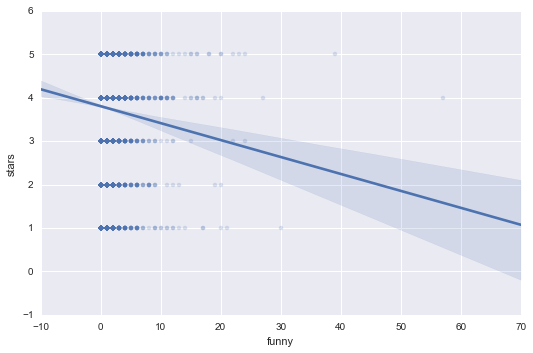

In [45]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.lmplot(x='cool', y='stars', data=yelp, aspect=1.5, scatter_kws={'alpha':0.2})
sns.lmplot(x='useful', y='stars', data=yelp, aspect=1.5, scatter_kws={'alpha':0.2})
sns.lmplot(x='funny', y='stars', data=yelp, aspect=1.5, scatter_kws={'alpha':0.2})


## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [9]:
feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.intercept_
print linreg.coef_


3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [12]:
# define a function that accepts a list of features and returns testing RMSE


def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [13]:
# calculate RMSE with all three features
print train_test_rmse(['cool', 'useful', 'funny'])

1.17336862742


## Task 6

Try removing some of the features and see if the RMSE improves.

In [69]:
print train_test_rmse(['cool', 'useful'])
print train_test_rmse(['useful', 'funny'])
print train_test_rmse(['cool', 'funny'])
print train_test_rmse(['cool'])
print train_test_rmse(['useful'])
print train_test_rmse(['funny'])


1.18537944234
1.20070113589
1.1851949299
1.20049049928
1.20143488625
1.20043591364
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1

## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [74]:
# new feature: 
yelp.dtypes

business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object

In [15]:
# new features: 
yelp['newdate'] = pd.to_datetime(yelp['date'])
yelp['month'] = yelp.newdate.dt.month
yelp['season']=''
yelp.loc[(yelp['month'] >= 1) & (yelp['month'] <=3), 'season'] = 1
yelp.loc[(yelp['month'] >= 4) & (yelp['month'] <=6), 'season'] = 2
yelp.loc[(yelp['month'] >= 7) & (yelp['month'] <=9), 'season'] = 3
yelp.loc[(yelp['month'] >= 10) & (yelp['month'] <=12), 'season'] = 4
season_dummies = pd.get_dummies(yelp.season, prefix='season')
yelp = pd.concat([yelp, season_dummies], axis=1)

In [18]:
# add new features to the model and calculate RMSE
feature_cols = ['cool', 'useful', 'funny', 'season_1', 'season_2', 'season_3']
X = yelp[feature_cols]
y = yelp.stars

linreg = LinearRegression()
linreg.fit(X, y)
print linreg.intercept_
print linreg.coef_


print train_test_rmse(['cool', 'useful', 'funny','season_1', 'season_2', 'season_3'])

3.7993971591
[ 0.27525464 -0.14824828 -0.13587929  0.07356968  0.04060035  0.04638145]
1.17347975443


Adding a seasons variable resulted in an RMSE that was slightly higher than the original model.

## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [58]:
feature_cols = ['cool', 'useful', 'funny']
y = yelp.stars
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
print y_test.describe()
print y_train.describe()
yelp['meany']=y_test.mean()
ypred = yelp.meany[2501:5001]
print ypred.describe()
np.sqrt(metrics.mean_squared_error(y_test, ypred))

#np.sqrt(metrics.mean_squared_error(y_test, y_test.pred))

count    2500.000000
mean        3.780800
std         1.202219
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: stars, dtype: float64
count    7500.000000
mean        3.776400
std         1.218825
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: stars, dtype: float64
count    2.500000e+03
mean     3.780800e+00
std      2.567349e-13
min      3.780800e+00
25%      3.780800e+00
50%      3.780800e+00
75%      3.780800e+00
max      3.780800e+00
Name: meany, dtype: float64


1.2019781029619465

In [ ]:
The original model performed better than the null model, with a lower RMSE.

## Task 9 (Bonus)

Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

In [19]:
# import and instantiate KNN
# # neighbors = 1
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
type(knn)

feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]

y = yelp.stars

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.1976


In [73]:
# note: classification models will automatically treat the response value (1/2/3/4/5) as unordered categories
# # neighbors = 10
knn = KNeighborsClassifier(n_neighbors=10)
type(knn)

feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.32


## Task 10 (Bonus)

Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.

In [25]:
feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars

linreg = LinearRegression()
linreg.fit(X, y)
print linreg.intercept_
print linreg.coef_

# test: predict the response values for the observations in X ("test the model") - make predictions classifications
y_pred_lr = linreg.predict(X_test)
y_pred_class = np.around(y_pred_lr, decimals = 0)
print y_pred_lr
print y_pred
 # STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
compute classification accuracy
from sklearn import metrics
print metrics.accuracy_score(y, y_pred_class)
def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]
[ 3.83989479  4.09370895  3.83989479 ...,  3.92872173  3.83989479
  3.83989479]
[ 4.  4.  4. ...,  4.  4.  4.]


In [26]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X = yelp[feature_cols]
y = yelp.stars
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88)

In [27]:
# STEP 2: train the model on the training set (using linear regression)
linreg.fit(X_train, y_train)
print linreg.intercept_
print linreg.coef_

# test: predict the response values for the observations in X ("test the model") - make predictions classifications
y_pred_lr = linreg.predict(X_test)
y_pred_class = np.around(y_pred_lr, decimals = 0)

3.85498832783
[ 0.2799588  -0.16532152 -0.12519611]


In [28]:
# STEP 3: test the model on the testing set, and check the accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.3496
